# 1D Interpolation - Fundamentals
- **Purpose**: Estimate values between known data points
- **scipy.interpolate**: interp1d, UnivariateSpline, PPoly
- **Applications**: Data filling, resampling, function approximation

Key concepts:
- **Interpolation**: Pass through all data points exactly
- **Extrapolation**: Estimate beyond data range (risky!)
- **Order/Degree**: Linear (1), quadratic (2), cubic (3), ...
- **Continuity**: C⁰ (continuous), C¹ (smooth), C² (smooth curvature)

Real applications:
- **Time series**: Fill missing timestamps, resample to regular grid
- **Financial data**: Fill gaps in trading data, align different frequencies
- **Sensor data**: Smooth noisy measurements
- **Physics**: Estimate continuous functions from discrete measurements
- **Computer graphics**: Smooth curves, animation paths

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("1D Interpolation module loaded")

1D Interpolation module loaded


## Linear Interpolation

**Simplest method**: Connect points with straight lines

**Formula**: For point between (x₁, y₁) and (x₂, y₂):
\[ y = y_1 + \frac{y_2 - y_1}{x_2 - x_1}(x - x_1) \]

**Properties**:
- Fast and simple
- C⁰ continuous (not smooth at data points)
- Good for sparse, noisy data

**Usage**:
```python
from scipy.interpolate import interp1d
f = interp1d(x, y, kind='linear')
y_new = f(x_new)
```

Temperature Data (sparse)
  Time (hours): [ 0  2  4  6  8 10 12]
  Temperature (°C): [15 16 18 22 25 23 20]

Temperature at t=5.0h: 20.00°C


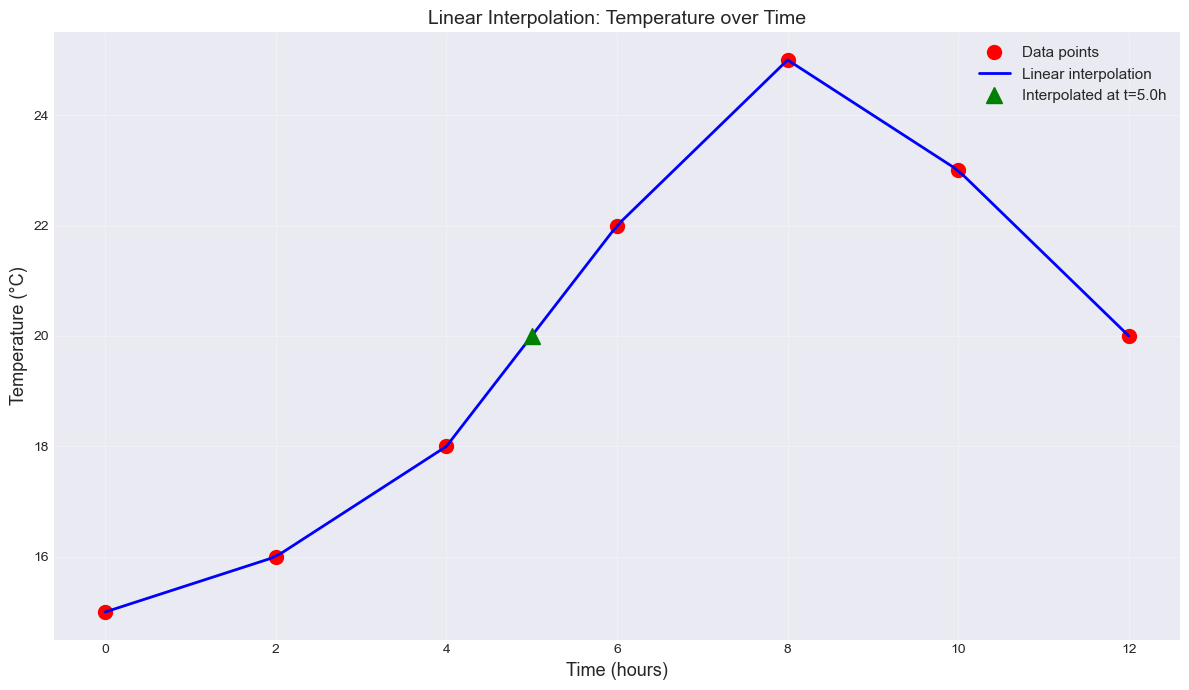


Linear interpolation connects points with straight lines


In [2]:
# Sample data: Temperature measurements
time_hours = np.array([0, 2, 4, 6, 8, 10, 12])
temperature = np.array([15, 16, 18, 22, 25, 23, 20])

print("Temperature Data (sparse)")
print(f"  Time (hours): {time_hours}")
print(f"  Temperature (°C): {temperature}\n")

# Linear interpolation
f_linear = interpolate.interp1d(time_hours, temperature, kind='linear')

# Interpolate at finer resolution
time_fine = np.linspace(0, 12, 100)
temp_interpolated = f_linear(time_fine)

# Test specific point
test_time = 5.0
test_temp = f_linear(test_time)
print(f"Temperature at t={test_time}h: {test_temp:.2f}°C")

# Visualize
plt.figure(figsize=(12, 7))
plt.plot(time_hours, temperature, 'ro', markersize=10, label='Data points')
plt.plot(time_fine, temp_interpolated, 'b-', linewidth=2, label='Linear interpolation')
plt.plot(test_time, test_temp, 'g^', markersize=12, 
         label=f'Interpolated at t={test_time}h')
plt.xlabel('Time (hours)', fontsize=13)
plt.ylabel('Temperature (°C)', fontsize=13)
plt.title('Linear Interpolation: Temperature over Time', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLinear interpolation connects points with straight lines")

## Polynomial Interpolation

**Higher-order methods**: Quadratic, cubic, etc.

**interp1d kinds**:
- `'linear'`: Piecewise linear (degree 1)
- `'quadratic'`: Piecewise quadratic (degree 2)
- `'cubic'`: Piecewise cubic (degree 3)

**Trade-offs**:
- Higher order → Smoother curves
- But can overshoot/oscillate (Runge's phenomenon)
- Cubic is often best balance

**Continuity**:
- Linear: C⁰ (kinks at data points)
- Quadratic: C¹ (smooth, but curvature discontinuous)
- Cubic: C² (smooth curvature)

Comparing Interpolation Orders
  Data points: 6


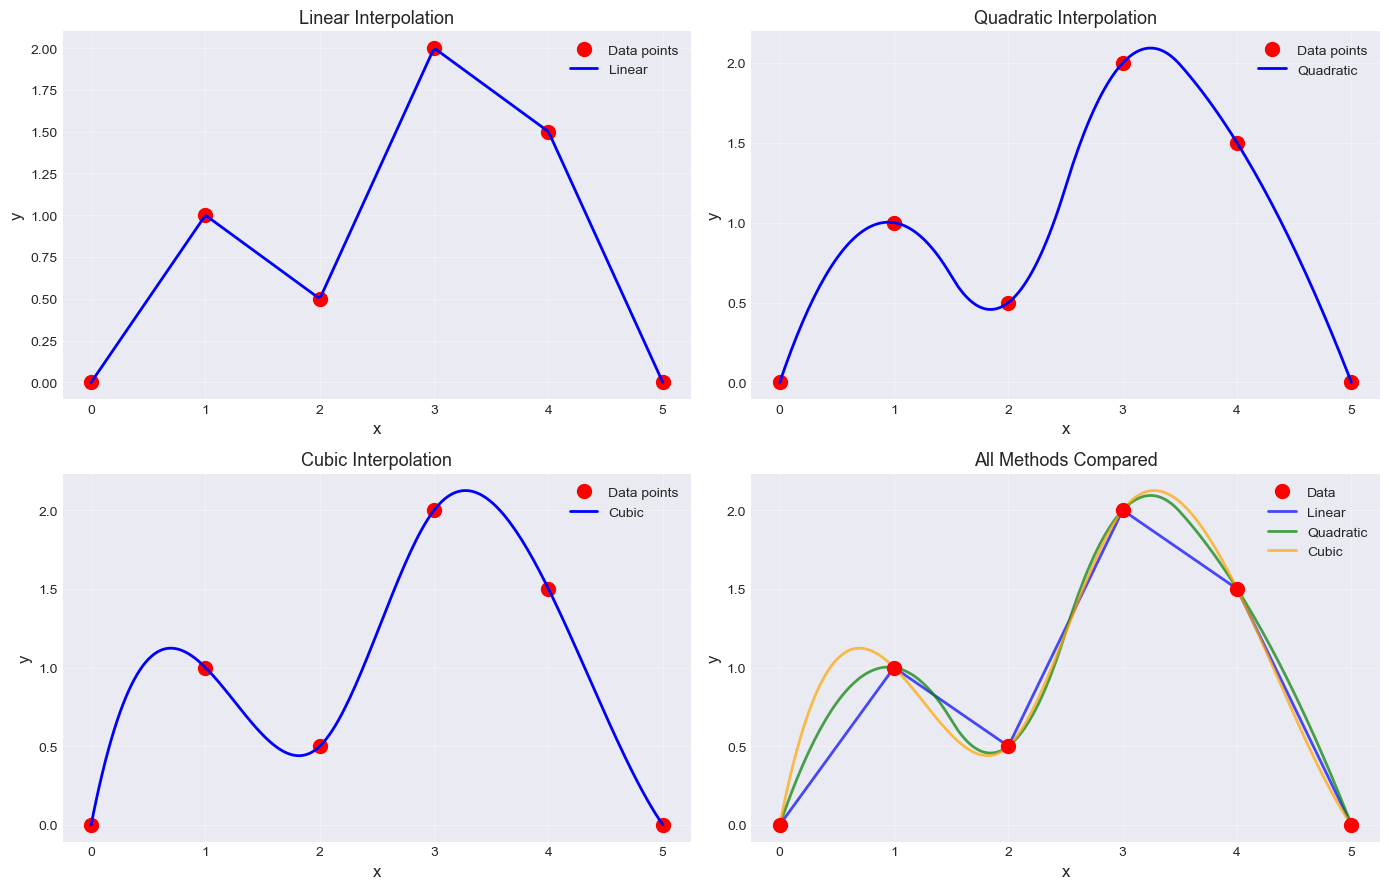


Key observations:
  - Linear: Sharp corners at data points
  - Quadratic: Smoother but can still have kinks
  - Cubic: Smoothest, most natural curves


In [3]:
# Compare interpolation methods
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0.5, 2, 1.5, 0])

print("Comparing Interpolation Orders")
print(f"  Data points: {len(x)}")

# Different interpolation methods
methods = ['linear', 'quadratic', 'cubic']
x_fine = np.linspace(0, 5, 200)

plt.figure(figsize=(14, 9))

for i, method in enumerate(methods, 1):
    f = interpolate.interp1d(x, y, kind=method)
    y_interp = f(x_fine)
    
    plt.subplot(2, 2, i)
    plt.plot(x, y, 'ro', markersize=10, label='Data points')
    plt.plot(x_fine, y_interp, 'b-', linewidth=2, label=f'{method.capitalize()}')
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'{method.capitalize()} Interpolation', fontsize=13)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

# All together
plt.subplot(2, 2, 4)
plt.plot(x, y, 'ro', markersize=10, label='Data', zorder=5)
colors = ['blue', 'green', 'orange']
for method, color in zip(methods, colors):
    f = interpolate.interp1d(x, y, kind=method)
    y_interp = f(x_fine)
    plt.plot(x_fine, y_interp, color=color, linewidth=2, 
             label=method.capitalize(), alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('All Methods Compared', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("  - Linear: Sharp corners at data points")
print("  - Quadratic: Smoother but can still have kinks")
print("  - Cubic: Smoothest, most natural curves")

## Real Example: Stock Price Interpolation

**Scenario**: Stock prices with gaps (holidays, trading halts)

**Challenge**: 
- Missing data on weekends/holidays
- Need continuous price estimate for analysis
- Different interpolation methods affect results

**Application**: 
- Portfolio valuation on non-trading days
- Technical indicators requiring continuous data
- Risk calculations

Stock Price Data with Gaps
  Trading days: [0 1 2 5 6 7 8]
  Prices ($): [100 102 101 105 104 106 107]
  Missing days: 3, 4 (e.g., holiday)

Interpolated prices for missing days:

Day 3 (Thursday):
  Linear: $102.33
  Cubic: $102.05

Day 4 (Friday):
  Linear: $103.67
  Cubic: $104.20


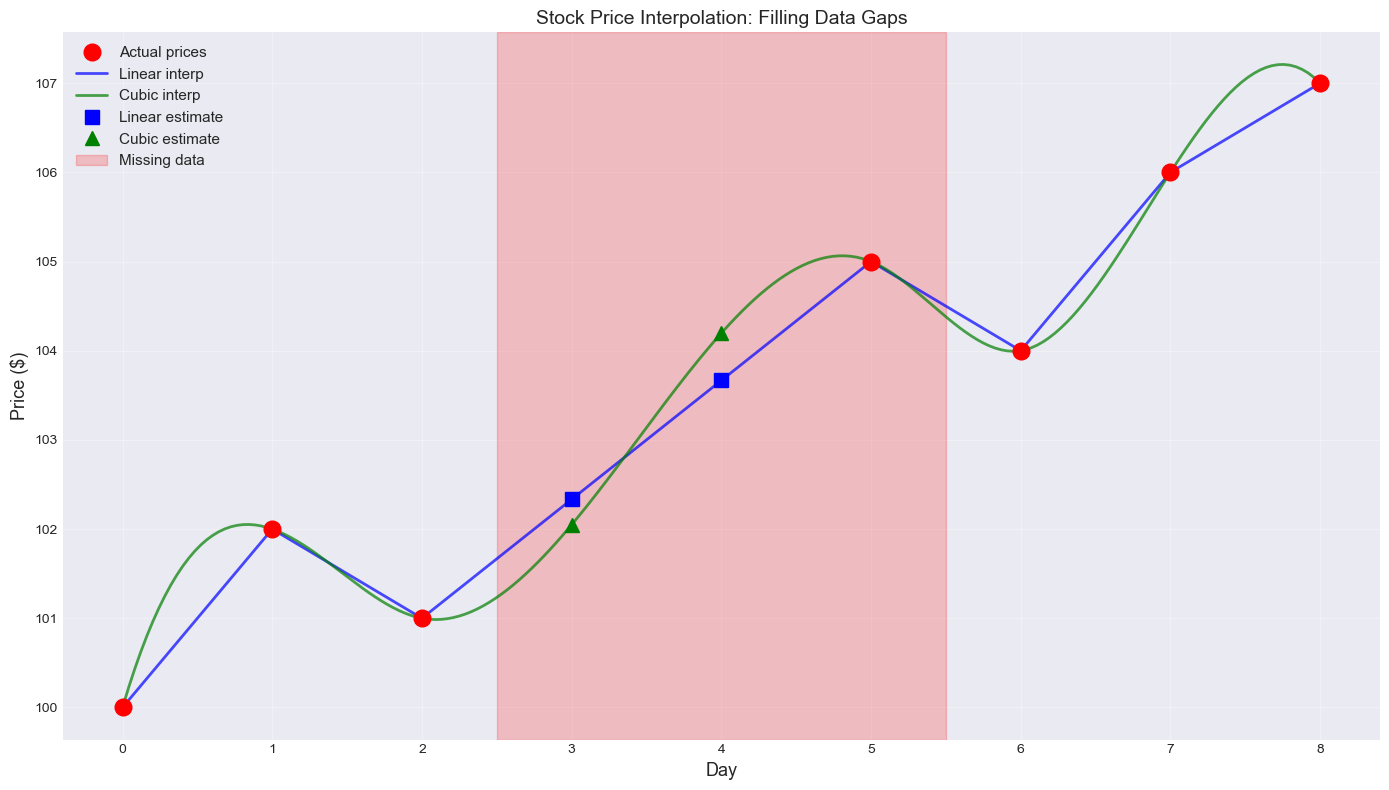


Cubic interpolation provides smoother estimates
Better captures price momentum through the gap


In [4]:
# Stock prices with gaps (simulated)
# Days: 0=Mon, 1=Tue, 2=Wed, 5=Sat (gap: Thu-Fri missing)
trading_days = np.array([0, 1, 2, 5, 6, 7, 8])  # Missing days 3, 4
prices = np.array([100, 102, 101, 105, 104, 106, 107])

print("Stock Price Data with Gaps")
print(f"  Trading days: {trading_days}")
print(f"  Prices ($): {prices}")
print(f"  Missing days: 3, 4 (e.g., holiday)\n")

# Interpolation methods
f_linear = interpolate.interp1d(trading_days, prices, kind='linear')
f_cubic = interpolate.interp1d(trading_days, prices, kind='cubic')

# Continuous timeline
all_days = np.linspace(0, 8, 200)
price_linear = f_linear(all_days)
price_cubic = f_cubic(all_days)

# Estimate missing days
missing_days = np.array([3, 4])
price_linear_missing = f_linear(missing_days)
price_cubic_missing = f_cubic(missing_days)

print("Interpolated prices for missing days:")
print(f"\nDay 3 (Thursday):")
print(f"  Linear: ${price_linear_missing[0]:.2f}")
print(f"  Cubic: ${price_cubic_missing[0]:.2f}")

print(f"\nDay 4 (Friday):")
print(f"  Linear: ${price_linear_missing[1]:.2f}")
print(f"  Cubic: ${price_cubic_missing[1]:.2f}")

# Visualize
plt.figure(figsize=(14, 8))
plt.plot(trading_days, prices, 'ro', markersize=12, label='Actual prices', zorder=5)
plt.plot(all_days, price_linear, 'b-', linewidth=2, alpha=0.7, label='Linear interp')
plt.plot(all_days, price_cubic, 'g-', linewidth=2, alpha=0.7, label='Cubic interp')
plt.plot(missing_days, price_linear_missing, 'bs', markersize=10, 
         label='Linear estimate')
plt.plot(missing_days, price_cubic_missing, 'g^', markersize=10,
         label='Cubic estimate')

# Highlight gap
plt.axvspan(2.5, 5.5, alpha=0.2, color='red', label='Missing data')

plt.xlabel('Day', fontsize=13)
plt.ylabel('Price ($)', fontsize=13)
plt.title('Stock Price Interpolation: Filling Data Gaps', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCubic interpolation provides smoother estimates")
print("Better captures price momentum through the gap")

## Extrapolation: Beyond Data Range

**Definition**: Estimate values outside [min(x), max(x)]

**Warning**: ⚠️ Extrapolation is risky!
- No data to validate
- Can produce unrealistic values
- Polynomial extrapolation especially unstable

**Options**:
1. **fill_value='extrapolate'**: Allow extrapolation
2. **fill_value=const**: Use constant for out-of-bounds
3. **bounds_error=True**: Raise error (default, safest)

**When to extrapolate**: Short-term, trend-based, with caution

Extrapolation Demonstration
  Data range: x ∈ [1, 5]
  Extrapolate to: x ∈ [0, 7]

Extrapolated values:
  x=0: Linear=0.00, Cubic=-12.00
  x=6: Linear=3.00, Cubic=-9.00
  x=7: Linear=2.00, Cubic=-43.00


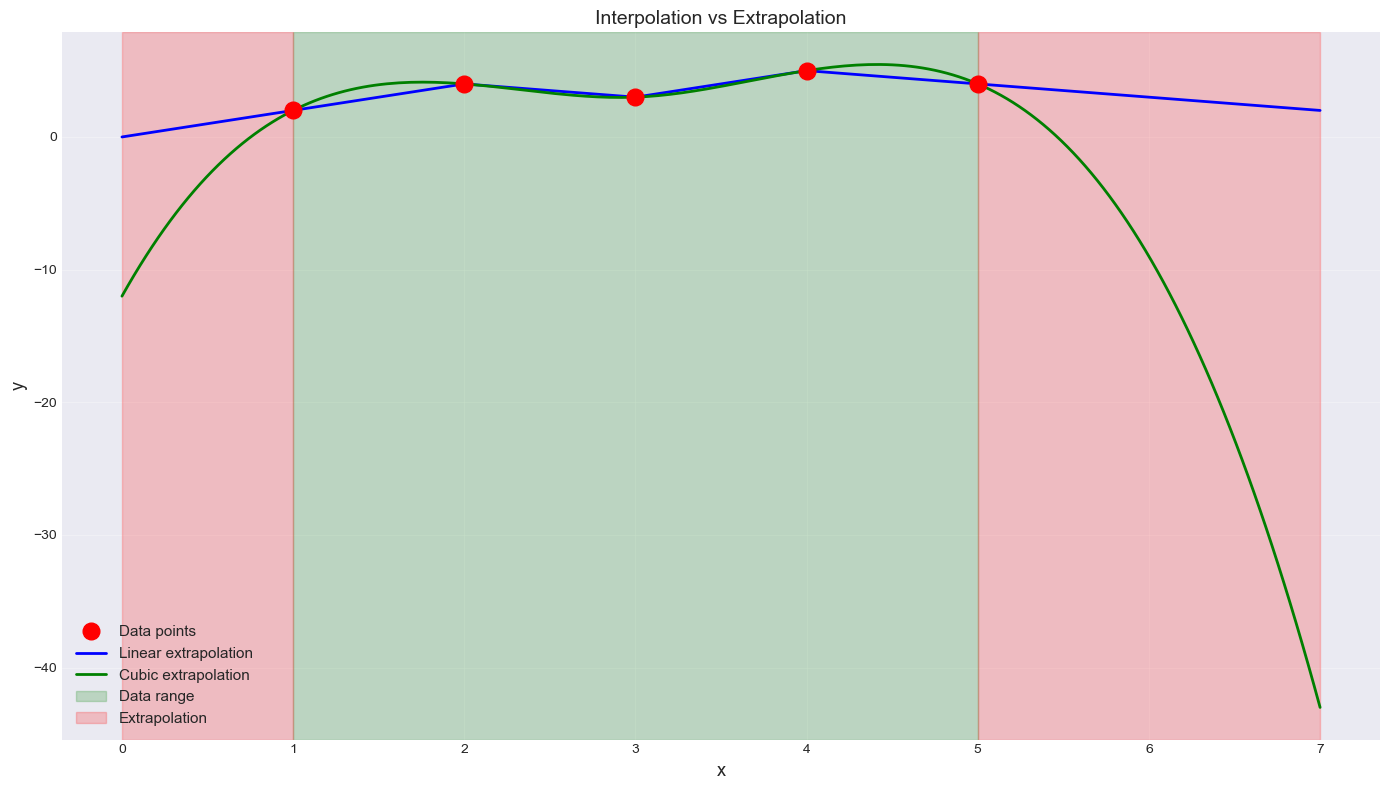


Key observations:
  - Linear extrapolation: Constant slope (safer)
  - Cubic extrapolation: Can diverge rapidly (risky!)
  - Use extrapolation with extreme caution


In [5]:
# Data in limited range
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 3, 5, 4])

print("Extrapolation Demonstration")
print(f"  Data range: x ∈ [{x.min()}, {x.max()}]")
print(f"  Extrapolate to: x ∈ [0, 7]\n")

# Interpolation with extrapolation
f_linear = interpolate.interp1d(x, y, kind='linear', fill_value='extrapolate')
f_cubic = interpolate.interp1d(x, y, kind='cubic', fill_value='extrapolate')

# Extended range
x_extended = np.linspace(0, 7, 200)
y_linear = f_linear(x_extended)
y_cubic = f_cubic(x_extended)

# Test extrapolation points
x_test = [0, 6, 7]
print("Extrapolated values:")
for xt in x_test:
    yl = f_linear(xt)
    yc = f_cubic(xt)
    print(f"  x={xt}: Linear={yl:.2f}, Cubic={yc:.2f}")

# Visualize
plt.figure(figsize=(14, 8))
plt.plot(x, y, 'ro', markersize=12, label='Data points', zorder=5)
plt.plot(x_extended, y_linear, 'b-', linewidth=2, label='Linear extrapolation')
plt.plot(x_extended, y_cubic, 'g-', linewidth=2, label='Cubic extrapolation')

# Mark data range
plt.axvspan(x.min(), x.max(), alpha=0.2, color='green', label='Data range')
plt.axvspan(0, x.min(), alpha=0.2, color='red', label='Extrapolation')
plt.axvspan(x.max(), 7, alpha=0.2, color='red')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Interpolation vs Extrapolation', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKey observations:")
print("  - Linear extrapolation: Constant slope (safer)")
print("  - Cubic extrapolation: Can diverge rapidly (risky!)")
print("  - Use extrapolation with extreme caution")

## Real Example: Time Series Resampling

**Problem**: Convert irregularly-sampled data to regular intervals

**Use cases**:
- Align multiple time series for analysis
- Resample sensor data to fixed frequency
- Prepare data for FFT (requires regular spacing)
- ML feature engineering (regular time steps)

**Application**: IoT sensor data, financial tick data

In [6]:
# Irregular sensor readings (e.g., event-triggered)
np.random.seed(42)
n_samples = 15
time_irregular = np.sort(np.random.uniform(0, 10, n_samples))
# Simulate temperature sensor with trend + noise
values = 20 + 0.5*time_irregular + 2*np.sin(time_irregular) + np.random.randn(n_samples)*0.5

print("Irregular Time Series Data")
print(f"  Samples: {n_samples}")
print(f"  Time range: {time_irregular.min():.2f} - {time_irregular.max():.2f}")
print(f"  Irregular spacing (gaps vary)\n")

# Resample to regular intervals
time_regular = np.linspace(0, 10, 50)  # 50 evenly-spaced points
f_resample = interpolate.interp1d(time_irregular, values, kind='cubic')
values_regular = f_resample(time_regular)

print("Resampled to Regular Grid")
print(f"  New samples: {len(time_regular)}")
print(f"  Spacing: Δt = {time_regular[1] - time_regular[0]:.3f}")
print(f"  Now ready for FFT and ML algorithms!")

# Statistics comparison
print(f"\nStatistics:")
print(f"  Original - Mean: {values.mean():.2f}, Std: {values.std():.2f}")
print(f"  Resampled - Mean: {values_regular.mean():.2f}, Std: {values_regular.std():.2f}")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Original irregular data
axes[0].stem(time_irregular, values, basefmt=' ', linefmt='b-', markerfmt='ro')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Original: Irregular Time Series', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Resampled regular data
axes[1].plot(time_regular, values_regular, 'b-', linewidth=2, label='Resampled')
axes[1].plot(time_irregular, values, 'ro', markersize=8, label='Original', alpha=0.6)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Value', fontsize=12)
axes[1].set_title('Resampled: Regular Grid (cubic interpolation)', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResampling enables:")
print("  ✓ Alignment with other time series")
print("  ✓ FFT and frequency analysis")
print("  ✓ ML models requiring fixed time steps")
print("  ✓ Consistent sampling rate for algorithms")

Irregular Time Series Data
  Samples: 15
  Time range: 0.21 - 9.70
  Irregular spacing (gaps vary)



ValueError: A value (0.0) in x_new is below the interpolation range's minimum value (0.20584494295802447).

## Summary

### Key Function:

```python
from scipy.interpolate import interp1d

# Create interpolator
f = interp1d(
    x, y,                      # Known data points
    kind='cubic',              # 'linear', 'quadratic', 'cubic'
    fill_value='extrapolate',  # Or constant, or bounds_error=True
    assume_sorted=True         # Speed optimization
)

# Interpolate new points
y_new = f(x_new)
```

### Method Selection:

| Method | Smoothness | Speed | Use When |
|--------|-----------|-------|----------|
| **Linear** | C⁰ (kinks) | Fastest | Sparse/noisy data |
| **Quadratic** | C¹ (smooth) | Fast | Moderate smoothness |
| **Cubic** | C² (very smooth) | Medium | Natural curves |

### Best Practices:

✓ **Cubic default**: Best balance for most cases  
✓ **Avoid extrapolation**: Stay within data range  
✓ **Check monotonicity**: Some methods preserve, some don't  
✓ **Regular spacing**: Helps algorithms, enables FFT  
✓ **Validate**: Plot interpolated function  

### Applications:

- **Time series**: Fill gaps, resample, align frequencies
- **Finance**: Price estimation, data synchronization
- **Sensor data**: Regular sampling from irregular readings
- **ML preprocessing**: Feature engineering, data augmentation
- **Signal processing**: Upsampling, anti-aliasing

### Common Pitfalls:

⚠️ **Extrapolation**: Can produce nonsensical values  
⚠️ **Overfitting**: High-order polynomials oscillate  
⚠️ **Unsorted data**: Must sort or set assume_sorted=False  
⚠️ **Duplicate x**: Raises error (not a function)  

### Next Topics:

- **Splines**: More flexible curve fitting
- **2D/3D**: Multi-dimensional interpolation
- **Smoothing**: Handle noisy data
- **Scattered data**: Non-grid points